In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, GRU, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt

In [2]:
with open("preprocessed_data.pickle","rb") as fr:
    data = pickle.load(fr)

In [3]:
data.keys()

dict_keys(['train_x', 'train_y', 'test_x', 'test_y', 'validation_x', 'validation_y', 'token', 'word_num', 'sentence_len', 'stop_words'])

In [4]:
t_x = data['train_x']
t_y = data['train_y']
tt_x = data['test_x']
tt_y = data['test_y']
v_x = data['validation_x']
v_y = data['validation_y']
token = data['token']
word_num = data['word_num']
sentence_len = data['sentence_len']
stop_w = data['stop_words']

In [5]:
batch_size = 256
max_sentence_num = 52
embedding_len = 64
neuron_num = 64
d_out = 0.6
lr = 0.001
ec = 50

In [6]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 3, restore_best_weights = True)
ck = ModelCheckpoint('best_m.h5', monitor = 'val_accuracy', mode = 'max', save_best_only = True)
t_bd = TensorBoard(log_dir = 'logs')

In [7]:
m = Sequential()
m.add(Embedding(word_num, embedding_len, input_length = max_sentence_num))
m.add(Bidirectional(LSTM(neuron_num, dropout = d_out, return_sequences = True)))
m.add(Bidirectional(LSTM(neuron_num // 2, dropout = d_out)))
m.add(Dense(neuron_num, activation = 'relu'))
m.add(Dropout(d_out))
m.add(BatchNormalization())
m.add(Dense(neuron_num // 2, activation = 'relu'))
m.add(Dropout(d_out))
m.add(BatchNormalization())
m.add(Dense(1, activation = 'sigmoid'))
m.compile(optimizer = Adam(lr), loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [8]:
hy = m.fit(t_x, t_y, epochs = ec, batch_size = batch_size, validation_data = (v_x, v_y), callbacks = [es, ck, t_bd])

Epoch 1/50
217/217 [==============================] - 90s 385ms/step - loss: 0.7577 - accuracy: 0.5298 - val_loss: 0.6105 - val_accuracy: 0.7233
Epoch 2/50
217/217 [==============================] - 98s 451ms/step - loss: 0.5298 - accuracy: 0.7495 - val_loss: 0.4959 - val_accuracy: 0.7630
Epoch 3/50
217/217 [==============================] - 101s 467ms/step - loss: 0.4542 - accuracy: 0.8036 - val_loss: 0.4746 - val_accuracy: 0.7741
Epoch 4/50
217/217 [==============================] - 96s 441ms/step - loss: 0.4222 - accuracy: 0.8200 - val_loss: 0.4809 - val_accuracy: 0.7716
Epoch 5/50
217/217 [==============================] - 91s 417ms/step - loss: 0.3980 - accuracy: 0.8339 - val_loss: 0.4896 - val_accuracy: 0.7699
Epoch 6/50
217/217 [==============================] - 84s 389ms/step - loss: 0.3798 - accuracy: 0.8422 - val_loss: 0.5101 - val_accuracy: 0.7639


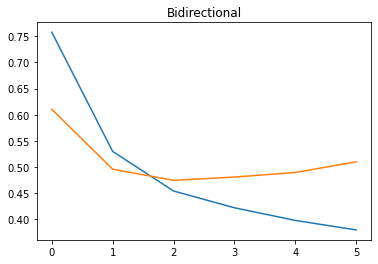

In [9]:
plt.plot(hy.history['loss'], label = 'loss')
plt.plot(hy.history['val_loss'], label = 'val_loss')
plt.title('Bidirectional')
plt.show()

In [10]:
m.evaluate(tt_x, tt_y)

929/929 [==============================] - 16s 18ms/step - loss: 0.4723 - accuracy: 0.7774


[0.4722881019115448, 0.7773849368095398]

In [11]:
%load_ext tensorboard
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 2028), started 1:05:51 ago. (Use '!kill 2028' to kill it.)